## COMP3670/6670 Programming Assignment 2 - Clustering and Vector Calculus
---

**Enter Your Student ID:**u6284513

**Your Name:**Xuecheng Zhang
    
**Deadline:**

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'.

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.

u6548263 have a discussion about kmeans clusters

**Programming Section**:
- 1.1: 15%
- 1.2: 20%
- 2.1: 10%
- 2.2: 15%
- 2.3: 15%
- 2.4: 10%
- 2.5: 10%
- 2.6: 5%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.core.display import HTML

np.random.seed(1)


In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


## Task1: Vector Calculus 
-----------
This part is about vector calculus. In this section, we will use the rigorous definition of the derivative to calculus it.
$$ f'(a) = \lim_{h \to 0}\dfrac{f(a + h) - f(a)}{h}$$
Now, expand it to vectors.

-----
**Task 1.1:** Calculate the gradient of $f(\textbf{x}) = \textbf{x}^T\textbf{a}$ respect to $\textbf{x}$.     $\textbf{x}, \textbf{a} \in \mathbb{R}^N$

In [2]:
N = 10
x = np.random.rand(N)
a = np.random.rand(N)

In [3]:
def derive_function1(x, a, N):
    # The answer is a vector
    # Please follow the rigorous defination of derivative to answer this question
    # Directly return the conclusion from textbook will not receive any mark.
    h = 1e-4
    # Your Code Here
    f_ = np.zeros(N)
    for i in range(N):
        x_ = np.copy(x)
        x_[i] += h
        f_[i] = (x_.T@a - x.T@a)/h
    return f_

print(derive_function1(x,a,N))

[0.41919451 0.6852195  0.20445225 0.87811744 0.02738759 0.67046751
 0.4173048  0.55868983 0.14038694 0.19810149]


-----
**Task 1.2:** Calculate the gradient of $f(\textbf{x}) = \textbf{x}^TB\textbf{x}$ respect to $\textbf{x}$.     $\textbf{x}\in \mathbb{R}^N, B\in \mathbb{R}^{N\times N}$

In [4]:
x = np.random.rand(N)
B = np.random.rand(N, N)

In [6]:
def derive_function2(x, B, N):
    # The answer is a vector
    # Please follow the rigorous defination of derivative to answer this question
    # Directly return the conclusion from textbook will not receive any mark.
    
    h = 1e-6
    # Your Code Here
    f_ = np.zeros(N)
    for i in range(N):
        x_ = np.copy(x)
        x_[i] += h
        f_[i] = (x_.T@B@x_ - x.T@B@x)/h
    return f_

derive_function2(x, B, N)

array([5.56160613, 5.28063459, 4.80625273, 5.24104123, 5.08233073,
       6.22523922, 6.71981275, 7.18584896, 4.74990033, 4.70465477])

## Task2: Clustering
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

(1000, 4)


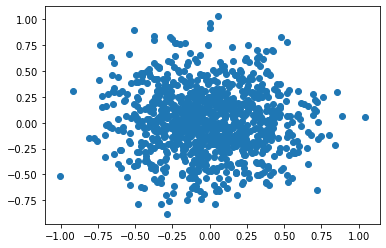

In [17]:
X = np.load("./data.npy")
plt.scatter(X[:,0], X[:,1])
plt.show()

The dataset contains 1000 4-dimensional samples. However, we don't know how many centroids it contains. The number of centroids is more than 5 but less than 10. We need to figure it out in the clustering procedure.

-----

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

If each of your samples, such as the 400 you generated in the previous question, are of dimension $n$, then each of your centroids will be of dimension $n$.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

---

**TASK 2.1:** Write a function $initialise\_parameters(m, n, X) = C$ which generates $m$ centroids, each of dimension $n$, and stores them in a matrix $C \in \mathbb{R}^{m \times n}$.

No two centroids should be the same, and **must not** be hard coded. Generate these parameters using a sensible initialisation method such as those described in the first link below. You will be judged based on whether the method you choose is sensible and likely to result in kmeans converging to good result.

---

**HINT:** 
- https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

In [37]:
def initialise_parameters(m, n, X):
    
    # Your Code Here
    
    '''
    Reference from http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf. 
    By using kmeans ++ (Farthest-point Traversal) algorithms to initialize the centeriods. The basic principle of KMeans algorithm in the initialization process 
    of clustering centers is to make the distance between the initial clustering centers as far as possible. 
    At first randomly select one point as a centeriod from these points. And then find another points which based on the possibility of 
    the distance to its nearest centroid. Therefore, in this way, the centeroids are chosen as far as possible to avoid existing two
    centeriods close each other which may generate local minima. 

    '''
    
    # initialize the centeriod
    C = np.empty((0,n))
    size = np.shape(X.flatten())[0]
    
    # change the shape of X
    X_ = np.copy(X).reshape((size//n,n))
    row,col = X_.shape
    #randomly choose a centeriod
    index = np.random.randint(0,row-1)
    first_centeriod = [X_[index]]
    #add the first centeriod
    C = np.append(C,first_centeriod,axis = 0)
    
    # set a list whose element is its index.
    choseindex = []
    for i in range(row):
        choseindex.append(i)
    print(X_.shape)
    print(m,n)
    while (C.shape[0]<m):
        minidist = []
        for point in X_:
            tmpdistlist = []
            for centeriod in C:
                # get the euclidean distance
                dist = ((point-centeriod).T @ (point-centeriod)) ** 0.5
                tmpdistlist.append(dist)
            # get the minimum list
            minidist.append(np.min(tmpdistlist))
        
        # let D^2/ sumof(D^2) as the possibility, 
        #After experiments, when power of 8, the performance is morely like to be good
        minidist = np.asarray(minidist)**2/np.sum(np.asarray(minidist)**2)
        #chosing the value based on the probablity
        maxValueindex = np.random.choice(np.asarray(choseindex),1,p=minidist)[0]

        # chosing the value if the value is the maximum
#         maxValueindex = np.argmax(minidist)
        maxValue = [X_[maxValueindex]]
        C = np.append(C,maxValue,axis=0)
        
    return C
                                              
C = initialise_parameters(8, 4, X)
# print(C)

(1000, 4)
8 4


Now we implement k-means.

---
   **TASK 2.2:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

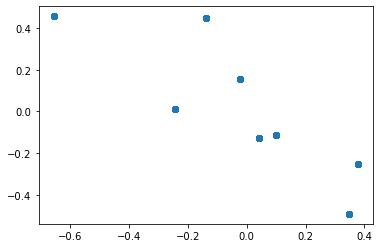

In [10]:
def E_step(C, X):
    L = np.zeros(X.shape)
    # Your Code Here
    row,col =  C.shape
    for i in range(X.shape[0]):
        minidist = []
        for j in range(row):
            minidist.append(((X[i]-C[j]).T@(X[i]-C[j]))**0.5)
        minindex = np.argmin(minidist)
        L[i] = C[minindex]
    return L

L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()

---

**TASK 2.3:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [38]:
def M_step(C, X, L):
    # Your Code Here
    crow,ccol = C.shape
    row,col = X.shape
    C_copy = np.copy(C)
    for i in range(crow):
        centeriod = []
        for j in range(row):
            if(np.array_equal(L[j],C[i])):
                 centeriod.append(X[j])
        if(not np.array_equal(centeriod,[])):
            C_copy[i] = np.mean(centeriod,axis = 0)
        else:
            print("??")
            
    return C_copy
    
# print(M_step(C,X,L))

---
**TASK 2.4:** Implement $kmeans(X, m, i) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$, and uses the previous 3 functions you wrote to:
- generate $m$ centroids.
- iterate between the E and M steps $i$ times (ie, it iterates $i$ times) to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after $i$ iterations.
- $L$, the labels (centroid values) assigned to each sample in the dataset after $i$ iterations.
---

In [39]:
def kmeans(X, m, i):
    L = np.zeros(X.shape)
    C = np.zeros((m, X.shape[1]))
    # Your Code Here
    
    #intialize the centeriod
    C = initialise_parameters(m,X.shape[1],X)
    for j in range(i):
        L = E_step(C,X)
        C = M_step(C, X, L)

    return C, L

print(kmeans(X,8,10))

(1000, 4)
8 4
(array([[-2.97274970e-02,  6.28260595e-03,  7.24157559e-01,
         7.23994810e-01],
       [-1.64387449e-02,  5.52484171e-03, -1.37920430e+00,
         1.25171462e+00],
       [ 3.35804013e-01,  9.39820452e-02,  1.44641826e+00,
         1.73716394e+00],
       [ 1.80182894e-02, -2.84548382e-02, -1.73314207e+00,
        -1.74422749e+00],
       [-1.15362482e-03,  3.56500354e-02, -5.02332315e-01,
        -7.41382419e-01],
       [-2.30938038e-02,  1.71549863e-02,  1.76052530e+00,
        -1.73716493e+00],
       [-1.61647729e-02,  2.54639072e-02,  1.00871817e+00,
        -7.26380789e-01],
       [-1.99776880e-01, -2.73886203e-02,  1.52433126e+00,
         1.76187827e+00]]), array([[-0.0297275 ,  0.00628261,  0.72415756,  0.72399481],
       [-0.0297275 ,  0.00628261,  0.72415756,  0.72399481],
       [-0.0297275 ,  0.00628261,  0.72415756,  0.72399481],
       ...,
       [-0.19977688, -0.02738862,  1.52433126,  1.76187827],
       [-0.19977688, -0.02738862,  1.52433126, 

---
**Task 2.5:** The following code is to display the result. However, due to the limitation of our visualization tools, it can only presents the data in the two dimensional space. While the dimension of the dataset is 4, we really want to visualize the data in the two dimensional figure. Besides, the number of centroids is not determined yet.

This task is ask you to modify the following code so as to give the best visualization effect. 

---
**HINT:** You only need to change "number of centroid", "dimension1", "dimension2" to a number, which are quoted by "#" in the following code. 

(1000, 4)
8 4
Initial Parameters:
[[-0.33844195  0.18747124  1.20084116  1.55208045]
 [ 0.350399   -0.29073998 -1.71783736 -1.87797617]
 [ 0.0248542  -0.11748591 -1.05403754  0.62724319]
 [-0.0566221  -0.34324065  2.03584656 -1.90541402]
 [ 0.17369286 -0.11479182  1.00221466 -0.84816899]
 [ 0.28271754 -0.29378564  1.84499892  1.91066952]
 [-0.31661972  0.07512326  1.54512301 -1.85590915]
 [-0.09078781 -0.60776254 -2.14070703  1.77783433]]

Final Parameters:
[[-2.05541611e-02 -2.94840798e-03 -7.34726213e-01  7.52580271e-01]
 [-3.12595827e-02  7.66544119e-03  7.32444784e-01  7.23499116e-01]
 [-2.30938038e-02  1.71549863e-02  1.76052530e+00 -1.73716493e+00]
 [ 1.80182894e-02 -2.84548382e-02 -1.73314207e+00 -1.74422749e+00]
 [-1.08975530e-02  1.26213183e-02 -2.01514271e+00  1.74712290e+00]
 [-1.61647729e-02  2.54639072e-02  1.00871817e+00 -7.26380789e-01]
 [-2.68311120e-03  1.72757846e-02  1.49565927e+00  1.75278340e+00]
 [-1.15362482e-03  3.56500354e-02 -5.02332315e-01 -7.41382419e-01]]


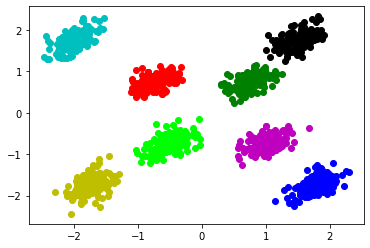

In [40]:
m = 8
i = 100
#CODE TO DISPLAY YOUR RESULTS.
C_final, L_final = kmeans(X, m, i)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'lime', 'wheat', 'fuchsia', 'pink']
for i in range(m):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,2], 
                cluster[:,3], 
                c=colours[i])
plt.show()

---
**TASK 2.6:** Use your own words to explain how you found the number of centroids in Task 2.5 and how you might do this in the real world.

---

The main principle of finding the number of centeriods is based on the inner distance between the same cluster. If the distance is very small, it indicates that the cluster may separate too many data points and data originally belonging to the same category is divided. If the distance is too large, it indicates that the data may not sufficiently divided and the data should be in the same category but not in one category. Therefore, it is predominant to find the right inner distance between the same cluster. 

By observing the graphic, I find that when n = 8 can generate the best performance/results and the Inertia is neither too large or big.

In the real world, to find the right inner distance, we have to draw the Inertia graph. The value of inertia decreases as the number of clusters increase. So, its a trade-off. The elbow point in the inertia graph is a good choice because after that point the change in the value of inertia is not significant. e.g. in the below graph, we are picking n=8 as n=8 is the elbow point of the whole graph.

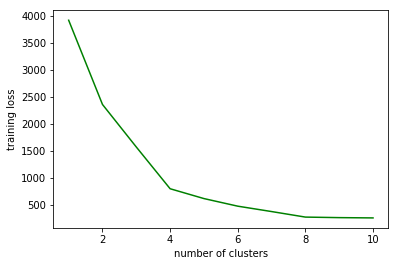

In [12]:
#calculate the euclidean difference between the clustering centers and points
def trainingloss(X,i):
    row,col = X.shape
    loss = 0
    _,L = kmeans(X,i,100)
    return np.linalg.norm(X-L)**2
    
plt.xlabel("number of clusters")
plt.ylabel("training loss")

start = 1
end = 11
ind_col = np.arange(start,end)
train_col = np.zeros((end-start,))
for i in range(start,end):
    train_col[i-start] = trainingloss(X,i)
    
plt.plot(ind_col,train_col,color='green')
    
plt.show()

In [27]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [33]:
import time
start = time.perf_counter()
np.arange(1000)
end = time.perf_counter()
print (end-start)

6.179999945743475e-05


In [34]:
start = time.perf_counter()
np.array([i for i in range(1000)])
end = time.perf_counter()
print (end-start)

0.0003352999992785044
